# t-SNE on MNIST Dataset

#### For this task I have downloaded the data from kaggle 
https://www.kaggle.com/c/digit-recognizer/data?select=train.csv



We know that MNIST data set is a dataset containing information about hand written numerical character in which each pixel is of 28x28 which is presented in 784 dimensions. For training data we have 42000 such data points which in result give a matrix of 42000x784.

In [1]:
# Importing libraries

import pandas as pd  # for loading data

import numpy as np  # for doing matrix calculations

import matplotlib.pyplot as plt  # for plotting graphs

from sklearn.preprocessing import StandardScaler  # for standardizing our data matrix 

from sklearn.manifold import TSNE   # for using t-SNE model

import seaborn as sn   # for creating colourful graphs and legends for plots

## Loading the data 

In [2]:
df=pd.read_csv("mnist_train.csv")

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
## Since in above case we can see that label is also given for each of the data points 
# so first we will separate labels and data

df_l=df['label']
data=df.drop('label' , axis=1)

In [5]:
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We know have separate 784 features for each data points.
Also we have separate data for labels so that we can verify our results.

In [6]:
data.shape

(42000, 784)

We can see that we have a dataset with large dimensions so visualization methods like pair plot, scatter plot etc., for 2d or 3d will not work here, so for this we will use t-SNE.

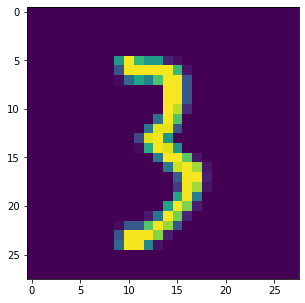

Label for this data point is : 3


In [7]:
## Before proceeding further I will first check our data is correct and also I have done correct separation or not

## For checking purpose I will take data point at any index and check if it matches with its label or not

plt.figure(figsize=(5,5))
index_value=234
fig_data=data.iloc[index_value].to_numpy().reshape(28,28)
plt.imshow(fig_data)
plt.show()


print("Label for this data point is : {}".format(df_l[index_value]))

## Applying t-SNE

In [8]:
## Standardizing the data

standardized_data=StandardScaler().fit_transform(data)
standardized_data.shape

(42000, 784)

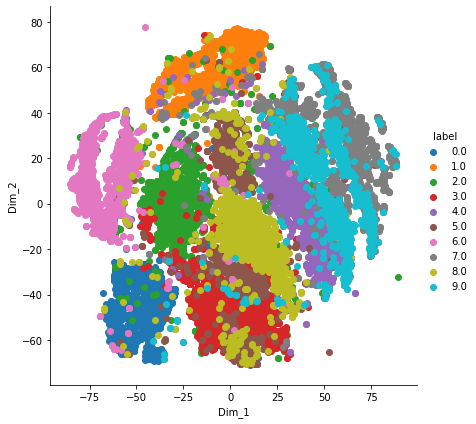

In [9]:
## Since t-SNE take lot of time for 42k datapoints so I will proceed with only 15k data points

data_1000 = standardized_data[0:15000,:]
labels_1000 = df_l[0:15000]

model = TSNE(n_components=2, random_state=0) # default perplexity is 30 and iteration is 1000

tsne_data = model.fit_transform(data_1000)


## creating a new dataframe for plotting purpose

tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

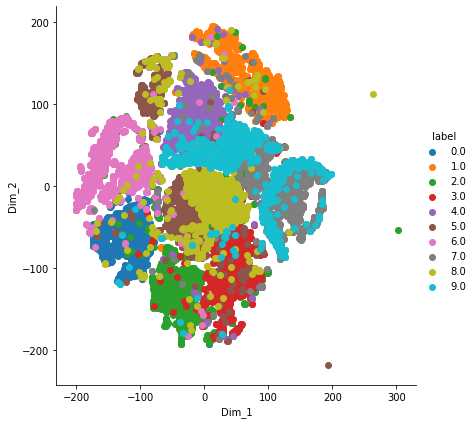

In [10]:
## Plotting with perplexity 10 and iteration=5000

model = TSNE(n_components=2, random_state=0, perplexity=10,n_iter=5000)

tsne_data = model.fit_transform(data_1000)


## creating a new dataframe for plotting purpose

tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

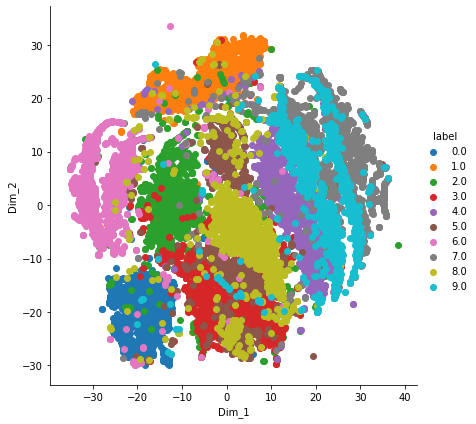

In [11]:
## Plotting with perplexity 50 and iteration=500

model = TSNE(n_components=2, random_state=0, perplexity=50,n_iter=500)

tsne_data = model.fit_transform(data_1000)


## creating a new dataframe for plotting purpose

tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

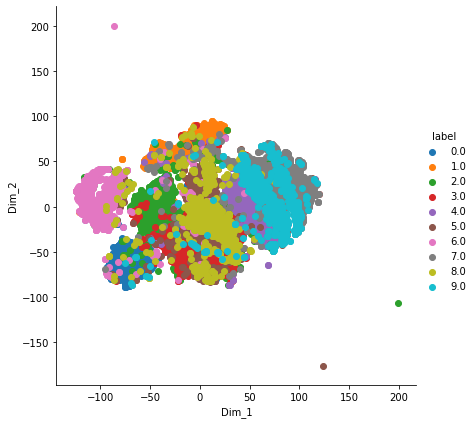

In [12]:
## Plotting with perplexity 50 and iteration=5000

model = TSNE(n_components=2, random_state=0, perplexity=50,n_iter=5000)

tsne_data = model.fit_transform(data_1000)


## creating a new dataframe for plotting purpose

tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

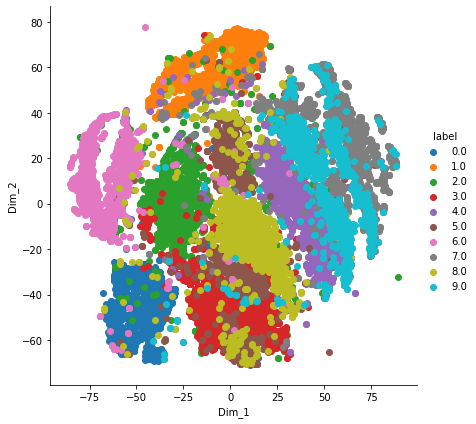

In [13]:
## Plotting with perplexity 30 and iteration=1000

model = TSNE(n_components=2, random_state=0, perplexity=30,n_iter=1000)

tsne_data = model.fit_transform(data_1000)


## creating a new dataframe for plotting purpose

tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

## Observation
So we have finally reduced the data from 728 dimensions to 2 dimensions for visualization.We can observe that datapoints of same type form a cluster as we increase the number of perplexity and interations but for very large value of perplexity cluster may not be more densed or grouped so we should choose an optimal value of perplexity and iterations. In our case the optimal perplexity is 30 and optimal number of iterations is 1000.

Also we should keep in notice that in t-SNE we cannot interpret anything from the size and distance between the clusters, they are significant for visualization purpose only.